In [55]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
pip install unidecode

In [57]:
import pandas as pd
import ast
# Importing Libraries 
import unidecode 
import re 
import time 
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
df=pd.read_csv('/content/gdrive/My Drive/Omdena_Normal/full_tag_extracted_results.csv')
df.head()

,Unnamed: 0,id,resourceLink,tags,paragraph,external,benefit,industry,country
0,0,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...","This past year, we extended this ethos not onl...",['test'],sustainable,supermarkets,Mexico
1,1,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...",We’re helping to grow healthier agriculture co...,['test'],sustainable,supermarkets,Mexico
2,2,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...",supply is available and U.S. Food and Drug \nI...,['test'],sustainable,supermarkets,Mexico
3,3,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...",We will be rolling out an employee engagement ...,['test'],sustainable,supermarkets,Mexico
4,4,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...","Board twice a year. Our ESG reports, including...",['test'],sustainable,supermarkets,Mexico


In [62]:
#get column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725284 entries, 0 to 725283
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    725284 non-null  int64 
 1   id            725284 non-null  object
 2   resourceLink  725284 non-null  object
 3   tags          725284 non-null  object
 4   paragraph     725284 non-null  object
 5   external      725284 non-null  object
 6   benefit       725284 non-null  object
 7   industry      725284 non-null  object
 8   country       725284 non-null  object
dtypes: int64(1), object(8)
memory usage: 49.8+ MB


In [63]:
df.isnull().sum()

Unnamed: 0      0
id              0
resourceLink    0
tags            0
paragraph       0
external        0
benefit         0
industry        0
country         0
dtype: int64

In [64]:
#count of records for each industry
df['industry'].value_counts()

floristry         159503
iron              158917
Life Insurance    112288
supermarkets      110404
steel             106052
fashion            78120
Name: industry, dtype: int64

**Fashion Industry:**

In [65]:
df[df['industry'] == 'fashion']['paragraph']

69516     The Textile and Apparel Industry and the Clima...
69517     Forty per cent of T&A imports into Ghana end u...
69518     There are challenges to building a circular te...
69519     With a large labour force and availability of ...
69520     3. Attract investors into the circular textile...
                                ...                        
725279    Blanc, P. (2016) Fake silk: The lethal history...
725280    Pulp and paper giant – end deforestation! 20 J...
725281    Novethic (2017) Devoir de vigilance. [ONLINE] ...
725282    uct groups and criteria. [ONLINE] Available at...
725283    Nordic Ecolabelling (n.d.) The Nordic Swan Eco...
Name: paragraph, Length: 78120, dtype: object

In [66]:
#dictionary of contractions mapped to the complete words to be used in text_cleaning
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}

#getting all stopwords
stoplist = stopwords.words('english') 
stoplist = set(stoplist)
print(stoplist)

{'the', 'why', 'isn', "it's", 't', 'him', 'herself', 'here', 'did', 'needn', 'your', "doesn't", 'hers', 'down', 'same', 'her', "you'd", 'when', 'having', 'o', 'didn', 'such', 'hadn', 'through', 'an', 'himself', 'them', "mustn't", 'of', "haven't", 'most', 'wasn', 'both', 'whom', 'only', 've', 'shan', 'yours', 'am', 'up', 'hasn', 'me', 'was', 'once', 'don', 'won', 'after', 'm', 'that', 'has', 'to', 'what', 'those', 'its', 'they', 'd', 'not', 'mightn', 'above', 'few', 'ain', 'their', 'this', 'will', 'ma', 'by', 'we', 'themselves', 'which', 'but', 'you', 'our', 'on', 'other', "you're", 'where', 'had', "you've", 'just', 'from', 'now', 'more', 'he', 'can', 'own', 'under', 'against', "mightn't", 'theirs', 'does', "that'll", "she's", 'each', 'or', 'aren', 'haven', 'nor', 'before', 'yourself', 'itself', 'as', 'be', 'ourselves', "won't", 'further', 'so', "wasn't", 'i', "wouldn't", 'until', 'who', 'with', 'is', 'have', 'a', 'about', "aren't", 'weren', 'yourselves', 'over', "shan't", 'some', 'too'

In [67]:
def text_cleaning(text):
    
    # Replacing all the occurrences of newlines and tabs, replae with whitespave
    formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')

    #remove accented characters
    formatted_text= unidecode.unidecode(formatted_text)

    # remove html tags
    soup = BeautifulSoup(formatted_text, "html.parser")
    formatted_text = soup.get_text(separator=" ")

    #remove extra whitespaces
    pattern = re.compile(r'\s+') 
    formatted_text = re.sub(pattern, ' ', formatted_text)
    #preserving the spaces after '?' & ')' so that It will not consider two words as one token.
    formatted_text = formatted_text.replace('?', ' ? ').replace(')', ') ')

    #converting to lower case
    formatted_text= formatted_text.lower()

    # Tokenizing text.
    token_list = formatted_text.split(' ')
    
    #remove contractions-If word is present in both dictionary & token_list, replace that word with the key value.
    for word in token_list: 
         if word in CONTRACTION_MAP: 
                token_list = [i.replace(word, CONTRACTION_MAP[word]) for i in token_list]           
    String_Of_tokens = ' '.join(str(e) for e in token_list)

    return String_Of_tokens

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer() 

#define function for stopword removal and lemmatization
def remove_stopwords_lemmatization(text):

    #remove all stopwords
    text_No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    words_string = ' '.join(text_No_StopWords) 

    # Converting words to their root forms
    text_lemmatized = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(words_string)]
    lemmatized_words_string=' '.join(text_lemmatized)

    return lemmatized_words_string

In [68]:
#make the dataset for fashion industry from original dataset
fashion_data= df[df['industry'] == 'fashion']

#view the original data
list_fashion = fashion_data['paragraph'].tolist()
list_fashion[0]

'The Textile and Apparel Industry and the Climate Crisis 5\nHow Can Ghana Maximise the Potential for a Circular\n The textile industry causes a massive amount of pollution, contributing up to 10 per cent of global\ngreenhouse-gas (GHG) emissions. The industry also generates a huge amount of waste, with clothing\neither being dumped in landfill or shipped to lower-income countries to be sold, causing environmental,\nThis paper looks at Ghana as a case study to explore the challenge of waste in the textile and apparel\n(T&A) industry and proposes practical solutions. Kantamanto, Ghana’s largest second-hand clothing\nmarket, and one of the biggest in the world, receives over 15 million articles of used clothing every week'

In [69]:
fashion_data['paragraph']=fashion_data['paragraph'].apply(text_cleaning)
fashion_data['paragraph']=fashion_data['paragraph'].apply(remove_stopwords_lemmatization)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
fashion_data.head()

,Unnamed: 0,id,resourceLink,tags,paragraph,external,benefit,industry,country
69516,69516,234b2142-e409-5756-a965-0170362ed25a.json,https://institute.global/sites/default/files/a...,"{'external': ['test'], 'benefit': 'sustainable...",textile apparel industry climate crisis 5 ghan...,['test'],sustainable,fashion,Germany
69517,69517,234b2142-e409-5756-a965-0170362ed25a.json,https://institute.global/sites/default/files/a...,"{'external': ['test'], 'benefit': 'sustainable...",forty per cent & import ghana end waste dispos...,['test'],sustainable,fashion,Germany
69518,69518,234b2142-e409-5756-a965-0170362ed25a.json,https://institute.global/sites/default/files/a...,"{'external': ['test'], 'benefit': 'sustainable...","challenge build circular textile economy , inc...",['test'],sustainable,fashion,Germany
69519,69519,234b2142-e409-5756-a965-0170362ed25a.json,https://institute.global/sites/default/files/a...,"{'external': ['test'], 'benefit': 'sustainable...",large labour force availability second-hand cl...,['test'],sustainable,fashion,Germany
69520,69520,234b2142-e409-5756-a965-0170362ed25a.json,https://institute.global/sites/default/files/a...,"{'external': ['test'], 'benefit': 'sustainable...",3. attract investors circular textile economy ...,['test'],sustainable,fashion,Germany


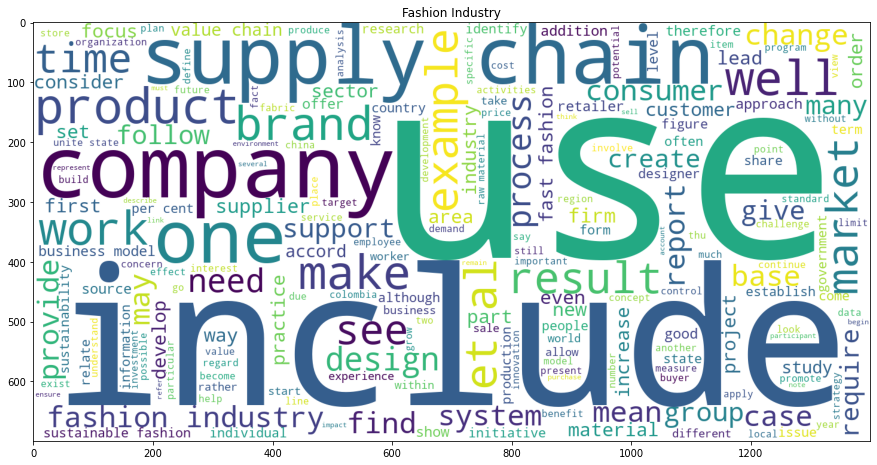

In [53]:
#generate wordcloud
wordcloud=WordCloud(background_color="white",width=1400,height=700).generate(' '.join(fashion_data['paragraph'].tolist()))
plt.figure(figsize=(15,10))
plt.title('Fashion Industry')
plt.imshow(wordcloud)